# Problem statement - 1

For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [1]:
#Import libraries
import re
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Elon_musk.csv',encoding='Latin-1')

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data=data.drop(columns=('Unnamed: 0'),axis=1)

In [7]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Pre-processing

# Step 1 : Removing spaces and symbol

In [8]:
data.Text=data.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [9]:
data

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...
...,...
1994,flcnhvy True it sounds so surreal but the nega...
1995,PPathole Make sure to read ur terms amp condit...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is UFUF


# Step - 2 : Make text to lower

In [10]:
data.Text=data.Text.apply(lambda x: x.lower())

In [11]:
data

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


# Step 3:- Splitting the words from line

In [12]:
data.Text=data.Text.apply(lambda x: x.split())

In [13]:
data

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


# Step 4 :- Removing Stopwords

In [14]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.Text=data.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [16]:
data

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."
...,...
1994,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, dumber, ufuf]"


# Step 5:- Stemming

In [17]:
ps = PorterStemmer()  
data.Text=data.Text.apply(lambda x: [ps.stem(word) for word in x])

In [18]:
data

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, underestim]"
4,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...
1994,"[flcnhvi, true, sound, surreal, neg, propagand..."
1995,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,"[teslagong, ppathol, samwis, gamge]"
1997,"[ppathol, altho, dumb, dumber, ufuf]"


# Step 6 :- Rejoining

In [19]:
data.Text=data.Text.apply(lambda x: " ".join(x))

In [20]:
data

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
1994,flcnhvi true sound surreal neg propaganda stil...
1995,ppathol make sure read ur term amp condit clic...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


# Sentiment Analysis

In [21]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [22]:
from textblob import TextBlob
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


# Problem Statement - 2

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [23]:
import requests
from bs4 import BeautifulSoup

## Scraping reviews using BeautifulSoup

In [24]:
link='https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [25]:
## Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [26]:
review_list

['INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles and Court judgments are in PDF( Legal documents use large font size and equal spacing, and lots of margin consuming only 10-12 lines in a page). It is better to convert them in mobi format online, and t

In [27]:
len(review_list)

50

In [28]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ..."
1,"I'd read reviews of people reading more books after getting the Kindle. I got the basic version and I love it. It's got different text sizes to read, comfortable to hold, comfortable to read. I initially thought it would be too small, but it works just fine for reading.Improvements:--> the touch could be a bit more responsive. Don't expect anything great-> Battery life was not up to the specified days. Expect lesser battery.-> Goodreads sync issues sometimesIf you want to get back into reading, would definitely recommend."
2,I have ordered on great Amazon sale got it for 6499. here is my honest feedback I would recommend not buy this if you're an avid reader. Bcz screen is very small and touch works but late.Battery doesn't work as they mentioned a week but believe it lasted only two days and returned it. Yiu better go for Kindle papar white 6.8 inches. That would do well. I have ordered that will wait for that.
3,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this device falls at range of acceptable level compared to books. So, the way it looks is fine with me.Coming to size, I did not find size of 6 inches problematic. This size is comfortable enough for reading. And the size is better than bigger sizes, for carrying it around, putting in pocket, and for si..."
4,But i can connect all wifi or Hotspot except My Phone. Easy to Read. Backlight is good
5,Built in light
6,"Good quality. Looks slow to use. But according to brotherwhom I gifted, apparently it works like that."
7,Touch screen response is a bit slow and sluggish could have been better. There should be screen 📴 after switching the power off button.
8,"I would first like to tell that I am a student of class 10th, I bought this 4 weeks ago.Why I bought this?I just wanted to build a new habit of reading, and I just made a target of reading atleast 1 book a week. I didn't want to use it to for my textbooks but wanted to see if it can handle it of not.Lets go on a detailed review.LOOK AND FEEL-The body is of plastic and has a kind of matt finish but it definitely not feel a premium gadget. It is easy to hold but some scratches at the back are visible. But thats not a problem as it still looks good. There are no scratches on the screen and I don't think there would be ever either.USER INTERFACE AND TOUCH-The overall interface is actually very bad if compared to a phone or tablet. But since it is not a replacement for tablet, but for books..."
9,"I am writing this for who are confused between kindle basic and paperwhite. If money is not a concern, go for paper white edition -it is worthy.1) Better display2) water resistance3) Type c port4) Better performance and battery.5) Reading mode and Dark modeBut kindle basic does the job, it is co

## Text preprocessing

In [29]:
## Converting to lower case

df['cleaned_reviews']=[x.lower()for x in df.Reviews]
df.head()

,Reviews,cleaned_reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ...","initial impressions- light weight and beautiful display. easy to hold, easy to read. thank you vani !why should one buy kindle?i was using kindle app on smartphone and pc for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). however, this lockdown forced me to spend all my time on phone and pc, leaving strained eyes. also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.this reader solves the problem in one go. it is light to hold for hours, and distraction free to improve your productivity to 2x-3x. best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.i am a law student and all my books, articles ..."
1,"I'd read reviews of people reading more books after getting the Kindle. I got the basic version and I love it. It's got different text sizes to read, comfortable to hold, comfortable to read. I initially thought it would be too small, but it works just fine for reading.Improvements:--> the touch could be a bit more responsive. Don't expect anything great-> Battery life was not up to the specified days. Expect lesser battery.-> Goodreads sync issues sometimesIf you want to get back into reading, would definitely recommend.","i'd read reviews of people reading more books after getting the kindle. i got the basic version and i love it. it's got different text sizes to read, comfortable to hold, comfortable to read. i initially thought it would be too small, but it works just fine for reading.improvements:--> the touch could be a bit more responsive. don't expect anything great-> battery life was not up to the specified days. expect lesser battery.-> goodreads sync issues sometimesif you want to get back into reading, would definitely recommend."
2,I have ordered on great Amazon sale got it for 6499. here is my honest feedback I would recommend not buy this if you're an avid reader. Bcz screen is very small and touch works but late.Battery doesn't work as they mentioned a week but believe it lasted only two days and returned it. Yiu better go for Kindle papar white 6.8 inches. That would do well. I have ordered that will wait for that.,i have ordered on great amazon sale got it for 6499. here is my honest feedback i would recommend not buy this if you're an avid reader. bcz screen is very small and touch works but late.battery doesn't work as they mentioned a week but believe it lasted only two days and returned it. yiu better go for kindle papar white 6.8 inches. that would do well. i have ordered that will wait for that.
3,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this device falls at

In [30]:
## Removing numbers and special characters
df['cleaned_reviews']=[re.sub('[^A-Za-z ]+', '',x)for x in df['cleaned_reviews']]
df.head()

,Reviews,cleaned_reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ...",initial impressions light weight and beautiful display easy to hold easy to read thank you vani why should one buy kindlei was using kindle app on smartphone and pc for quite few years and was skeptical of investing on this mere kindle reader books need to be purchased separately however this lockdown forced me to spend all my time on phone and pc leaving strained eyes also distractionswhatspp youtube etc is so high while reading on internet connected devicesthis reader solves the problem in one go it is light to hold for hours and distraction free to improve your productivity to xx best of all no strains on eyes means you can carry your work for more amount of time effectively making you productive by xxi am a law student and all my books articles and court judgments are in pdf legal...
1,"I'd read reviews of people reading more books after getting the Kindle. I got the basic version and I love it. It's got different text sizes to read, comfortable to hold, comfortable to read. I initially thought it would be too small, but it works just fine for reading.Improvements:--> the touch could be a bit more responsive. Don't expect anything great-> Battery life was not up to the specified days. Expect lesser battery.-> Goodreads sync issues sometimesIf you want to get back into reading, would definitely recommend.",id read reviews of people reading more books after getting the kindle i got the basic version and i love it its got different text sizes to read comfortable to hold comfortable to read i initially thought it would be too small but it works just fine for readingimprovements the touch could be a bit more responsive dont expect anything great battery life was not up to the specified days expect lesser battery goodreads sync issues sometimesif you want to get back into reading would definitely recommend
2,I have ordered on great Amazon sale got it for 6499. here is my honest feedback I would recommend not buy this if you're an avid reader. Bcz screen is very small and touch works but late.Battery doesn't work as they mentioned a week but believe it lasted only two days and returned it. Yiu better go for Kindle papar white 6.8 inches. That would do well. I have ordered that will wait for that.,i have ordered on great amazon sale got it for here is my honest feedback i would recommend not buy this if youre an avid reader bcz screen is very small and touch works but latebattery doesnt work as they mentioned a week but believe it lasted only two days and returned it yiu better go for kindle papar white inches that would do well i have ordered that will wait for that
3,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this device falls at range of acceptable level compared to books. 

In [32]:
## Removing stopwords

df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords.words('english')]))


## Generating WordCloud

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#pip install wordcloud

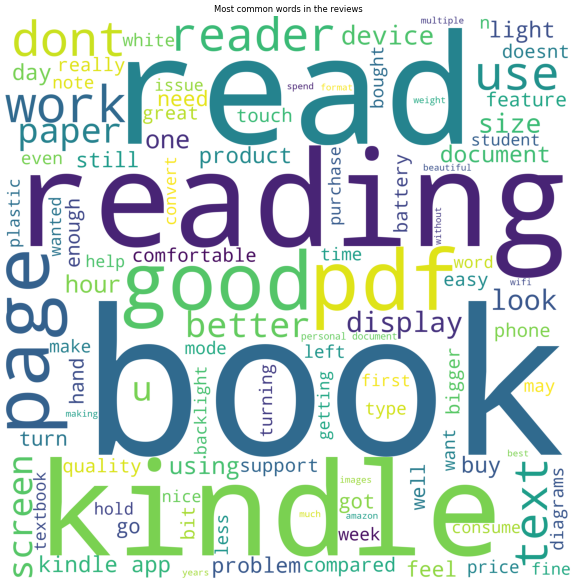

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

## Sentiment Analysis Using Vader

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...


True

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [45]:
## Extracting only the compound score
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [46]:
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x:sentiment_score(x))


In [47]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,cleaned_reviews,sentiment_score
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reade...",initial impressions light weight beautiful display easy hold easy read thank vani one buy kindlei using kindle app smartphone pc quite years skeptical investing mere kindle reader books need purchased separately however lockdown forced spend time phone pc leaving strained eyes also distractionswhatspp youtube etc high reading internet connected devicesthis reader solves problem one go light hold hours distraction free improve productivity xx best strains eyes means carry work amount time eff...,0.9963
1,"I'd read reviews of people reading more books after getting the Kindle. I got the basic version and I love it. It's got different text sizes to read, comfortable to hold, comfortable to read. I initially thought it would be too small, but it works just fine for reading.Improvements:--> the touch could be a bit more responsive. Don't expect anything great-> Battery life was not up to the specified days. Expect lesser battery.-> Goodreads sync issues sometimesIf you want to get back into readi...",id read reviews people reading books getting kindle got basic version love got different text sizes read comfortable hold comfortable read initially thought would small works fine readingimprovements touch could bit responsive dont expect anything great battery life specified days expect lesser battery goodreads sync issues sometimesif want get back reading would definitely recommend,0.9460
2,I have ordered on great Amazon sale got it for 6499. here is my honest feedback I would recommend not buy this if you're an avid reader. Bcz screen is very small and touch works but late.Battery doesn't work as they mentioned a week but believe it lasted only two days and returned it. Yiu better go for Kindle papar white 6.8 inches. That would do well. I have ordered that will wait for that.,ordered great amazon sale got honest feedback would recommend buy youre avid reader bcz screen small touch works latebattery doesnt work mentioned week believe lasted two days returned yiu better go kindle papar white inches would well ordered wait,0.9501
3,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this...",initially skeptical resolution size device going spend bomb higher resolutions bigger screen sizes source reading limited largely kindle store wanted first try kindle convinced may upgrade lateri compared look screen books looks good paper quality print quality books vary widely ranging glossy papers recycled papers would say device falls range acceptable level compared books way looks fine mecoming size find size inches problematic size comfortable enough reading size better bigger sizes ca...,0.9777
4,But i can connect all wifi or Hotspot except My Phone. Easy to Read. Backlight is good,connect wifi hotspot except phone easy read backlight good,0.7003


In [48]:
## Defining function to assign sentiment category based on sentiment scores
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [49]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))


In [50]:
df.head()

,Reviews,cleaned_reviews,sentiment_score,sentiment
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reade...",initial impressions light weight beautiful display easy hold easy read thank vani one buy kindlei using kindle app smartphone pc quite years skeptical investing mere kindle reader books need purchased separately however lockdown forced spend time phone pc leaving strained eyes also distractionswhatspp youtube etc high reading internet connected devicesthis reader solves problem one go light hold hours distraction free improve productivity xx best strains eyes means carry work amount time eff...,0.9963,Positive
1,"I'd read reviews of people reading more books after getting the Kindle. I got the basic version and I love it. It's got different text sizes to read, comfortable to hold, comfortable to read. I initially thought it would be too small, but it works just fine for reading.Improvements:--> the touch could be a bit more responsive. Don't expect anything great-> Battery life was not up to the specified days. Expect lesser battery.-> Goodreads sync issues sometimesIf you want to get back into readi...",id read reviews people reading books getting kindle got basic version love got different text sizes read comfortable hold comfortable read initially thought would small works fine readingimprovements touch could bit responsive dont expect anything great battery life specified days expect lesser battery goodreads sync issues sometimesif want get back reading would definitely recommend,0.9460,Positive
2,I have ordered on great Amazon sale got it for 6499. here is my honest feedback I would recommend not buy this if you're an avid reader. Bcz screen is very small and touch works but late.Battery doesn't work as they mentioned a week but believe it lasted only two days and returned it. Yiu better go for Kindle papar white 6.8 inches. That would do well. I have ordered that will wait for that.,ordered great amazon sale got honest feedback would recommend buy youre avid reader bcz screen small touch works latebattery doesnt work mentioned week believe lasted two days returned yiu better go kindle papar white inches would well ordered wait,0.9501,Positive
3,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this...",initially skeptical resolution size device going spend bomb higher resolutions bigger screen sizes source reading limited largely kindle store wanted first try kindle convinced may upgrade lateri compared look screen books looks good paper quality print quality books vary widely ranging glossy papers recycled papers would say device falls range acceptable level compared books way looks fine mecoming size find size inches problematic size comfortable enough reading size better bigger sizes ca...,0.9777,Positive
4,But i can connect all wifi or Hotspot except My Phone. Easy to Read. Backlight is good,connect wifi hotspot except phone easy read backlight good,0.7003,Positive


In [51]:
## calculating the categories of sentiments and their counts
df['sentiment'].value_counts()

Positive    37
Neutral     12
Negative     1
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

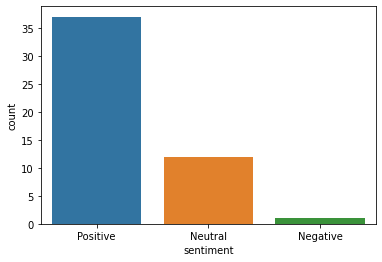

In [52]:
sns.countplot(x=df['sentiment'])

### As visible from the plot, the overall sentiment of people who purchased the product(Kindle Reader- 10th Gen) is positive.